# Homework 6


## B. Geometric Brownian Motion: Simulation and Statistical Tests

Homework completed by Alexandra Stephens. Assignment can be found at https://sites.google.com/site/jhu553633/homework

Perform a statistical test of the accuracy on the accuracy of $\Delta t = 10^{-4}$ versus $\Delta t = 10^{-1}$ using the Euler approximation method. For each $\Delta t$ complete 100 independent runs of the E-M process, starting at $X(0) = 1$. Then, for each $\Delta t$, compute the two- sided P-value from a t-test of the sample mean of the 100 runs of the E-M process at the terminal value $(t = 1)$ versus the true mean at the same (terminal) time. How do the two P-values compare? Does this experiment correspond to a test of the weak or strong measure of accuracy?

In [1]:
# define the Euler approximation
import numpy as np
import math
from numpy.random import normal as norm

h1 = 10**(-4)
mu = 1.
sigma = 0.2
n = int(1/h1)

Y1 = np.ones((100,n))
# use a vector instead of recursion for speed
for i in range(100):
    Z1 = norm(0,1,n)
    for k in range (1,n):
        Y1[i,k] = Y1[i,k-1]*(1 + mu*h1 + sigma*math.sqrt(h1)*Z1[k])
# need to go from time 0 to time 1, then simulate that 100 times.

In [2]:
# Find the mean at the terminal time
xbar1 = np.mean(Y1[:,n-1])
true_mu = mu*math.exp(mu)
xbar1

2.7308001337932315

In [3]:
# Compute two-sided P-value with scipy.stats
# "This is a two-sided test for the null hypothesis that the expected value (mean) of 
# a sample of independent observations a is equal to the given population mean, popmean."
import scipy.stats as stats
statistic1, pvalue1 = stats.ttest_1samp(Y1[:,n-1], true_mu)
print("The test statistic is " + str(statistic1) + ". The p-value is " + str(pvalue1))

The test statistic is 0.222920281443. The p-value is 0.824056844968


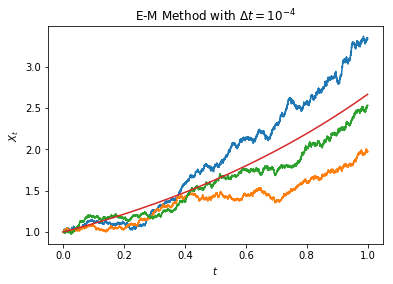

In [4]:
import matplotlib.pyplot as plt
x = np.linspace(0,1,n)
true = []
for i in x:
    true.append(math.exp(i*(mu-(sigma**2)/2)))

plt.plot(x, Y1[0,:], x, Y1[1,:], x, Y1[2,:],x,true)

plt.title('E-M Method with $\Delta t = 10^{-4}$')
plt.xlabel('$t$')
plt.ylabel('$X_{t}$')
plt.show()

### Repeat with different $\Delta t$

In [5]:
# Now repeat with different h 
h2 = 10**(-1)
n = int(1/h2)

Y2 = np.ones((100,n))
# use a vector instead of recursion
for i in range(100):
    Z1 = norm(0,1,n)
    for k in range (1,n):
        Y2[i,k] = Y2[i,k-1]*(1 + mu*h2 + sigma*math.sqrt(h2)*Z1[k])

In [6]:
# Find the mean at the terminal time
xbar2 = np.mean(Y2[:,n-1])
true_mu = mu*math.exp(mu)#2.5 # made up for now
xbar2

2.3748800331439308

In [7]:
import scipy.stats as stats
statistic2, pvalue2 = stats.ttest_1samp(Y2[:,n-1], true_mu)
print("The test statistic is " + str(statistic2) + ". The p-value is " + str(pvalue2))

The test statistic is -9.01391009324. The p-value is 1.54527326659e-14


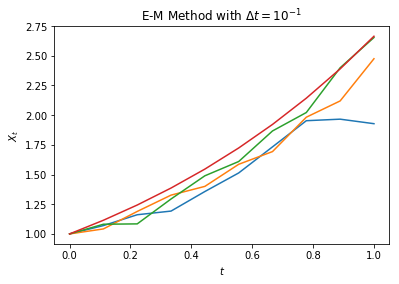

In [8]:
import matplotlib.pyplot as plt
x = np.linspace(0,1,n)
true = []
for i in x:
    true.append(math.exp(i*(mu-(sigma**2)/2)))
    
plt.plot(x, Y2[0,:], x, Y2[1,:], x, Y2[2,:],x,true)
plt.title('E-M Method with $\Delta t = 10^{-1}$')
plt.xlabel('$t$')
plt.ylabel('$X_{t}$')
plt.show()

How do the two P-values compare? Does this experiment correspond to a test of the weak or strong measure of accuracy?

The p value for $\Delta t = 10^{-4}$ is much larger than any normal p (such as p < 0.05) we might use as a rejection region. Thus, we fail to reject the null hypothesis that the sample mean is equal to the actual mean. The p value for $\Delta t = 10^{-1}$ is much smaller than any normal p value, thus we reject the null that the sample mean is equal to the actual mean. In summary, the p value for $\Delta t = 10^{-4}$ is much larger than the p value for $\Delta t = 10^{-1}$.

This experiment correspond to a test of **weak measure of accuracy** because we are doing the t-test on *distributional properties* of $X(t)$; we are using the mean of the sample path values at the terminal time, not individual sample path values.

## Ornstein-Uhlenbeck process

In [9]:
theta = 1
mu = 20
sigma = 10
delta_t = 0.01
n = int(5/delta_t)
X = np.zeros((50,n))
delta_w = norm(0,delta_t,n)

In [10]:
for i in range(50):
    delta_w = norm(0,delta_t,n)
    for k in range (1,n):
        X[i,k] = X[i,k-1] + theta*(mu - X[i,k-1])*delta_t + sigma*delta_w[k]

In [11]:
sample_mean = np.mean(X,axis = 0)

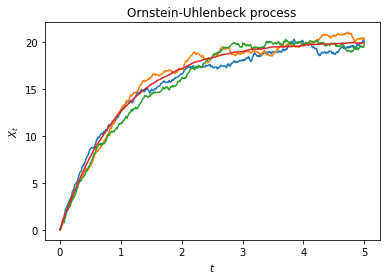

In [12]:
import matplotlib.pyplot as plt
x = np.linspace(0,5,n)
plt.plot(x, X[0,:], x, X[1,:], x, X[2,:],x,sample_mean)
plt.title('Ornstein-Uhlenbeck process')
plt.xlabel('$t$')
plt.ylabel('$X_{t}$')
plt.show()

Q: Comment on how the sample mean differs from its limiting value as a function of t 

A: As t increases, the sample mean grows closer to its limiting value, 20. It does this in a non-linear fasion, getting closer to 20 more slowly as t gets larger.

 Perform a statistical t-test on whether the (unknown) true mean of the value of $X_{j}$ (from the E-M process) that represents X(2) is $\mu$. That is, report a two-sided P-value and provide some brief interpretation. Do the same for X(5).

In [13]:
# For X(2)
statistic, pvalue = stats.ttest_1samp(X[:,int(2/delta_t) -1], 20)
print("The test statistic is " + str(statistic) + ". The p-value is " + str(pvalue))

The test statistic is -27.0270119717. The p-value is 4.25617238105e-31


In [14]:
# For X(5)
statistic, pvalue = stats.ttest_1samp(X[:,int(5/delta_t) -1], 20)
print("The test statistic is " + str(statistic) + ". The p-value is " + str(pvalue))

The test statistic is -0.733194881509. The p-value is 0.466932963388


Q: "provide some brief interpretation"

A: The p-value at time 2 is very small, suggesting we reject the null that the two means are equal. The p-value at time 5 is large enough that we would not reject this null. In summary, at time 2, the sample mean of X is further from $\mu  = 20$ than at time 5 since the p-value is much smaller at time 2. This reiterates our previous interpretations on how the sample mean differs from its limiting value as a function of t.